5.196152422706632
9
Accuracy: 0.6
Generalization Error: 0.4
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666
Confusion Matrix:
 [[1 1]
 [1 2]]


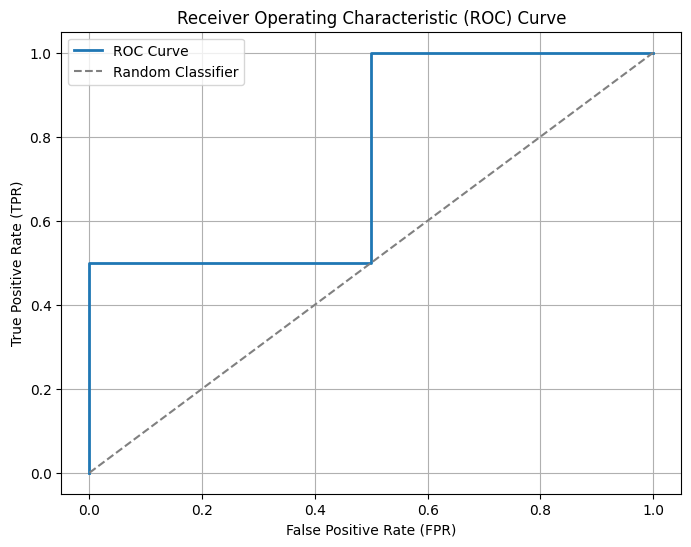

AUC Score: 0.75


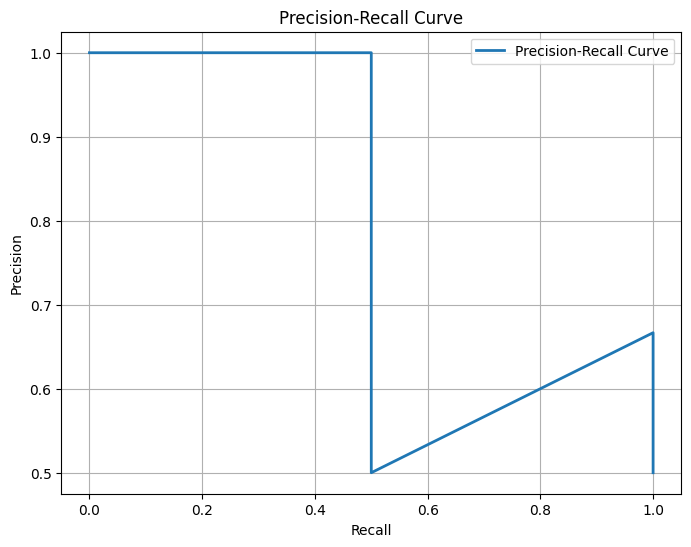

Predictions (Column Vector):
 [[0]
 [0]
 [0]
 [0]]
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8   

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.0              0.29         0.41            10.8      0.048   
1            5.4              0.53         0.16             2.7      0.036   
2            7.1              0.25         0.39             2.1      0.036   
3            7.3              0.28         0.35             1.6      0.054   
4            6.5              0.32         0.34             5.7      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 55.0                 149.0  0.99370  3.09       0.59   
1                 34.0                 128.0  0.98856  3.20       0.53   
2                 30.0                 124.0  0.99080  3.28       0.43   
3                 31.0                 148.0  0.99178  3.18       0.47   
4                 27.0                  91.0  0.99184  3.28       0.60   

     alcohol  quality  
0  10.966667        1  
1  13.200000        1  
2  12.200000  

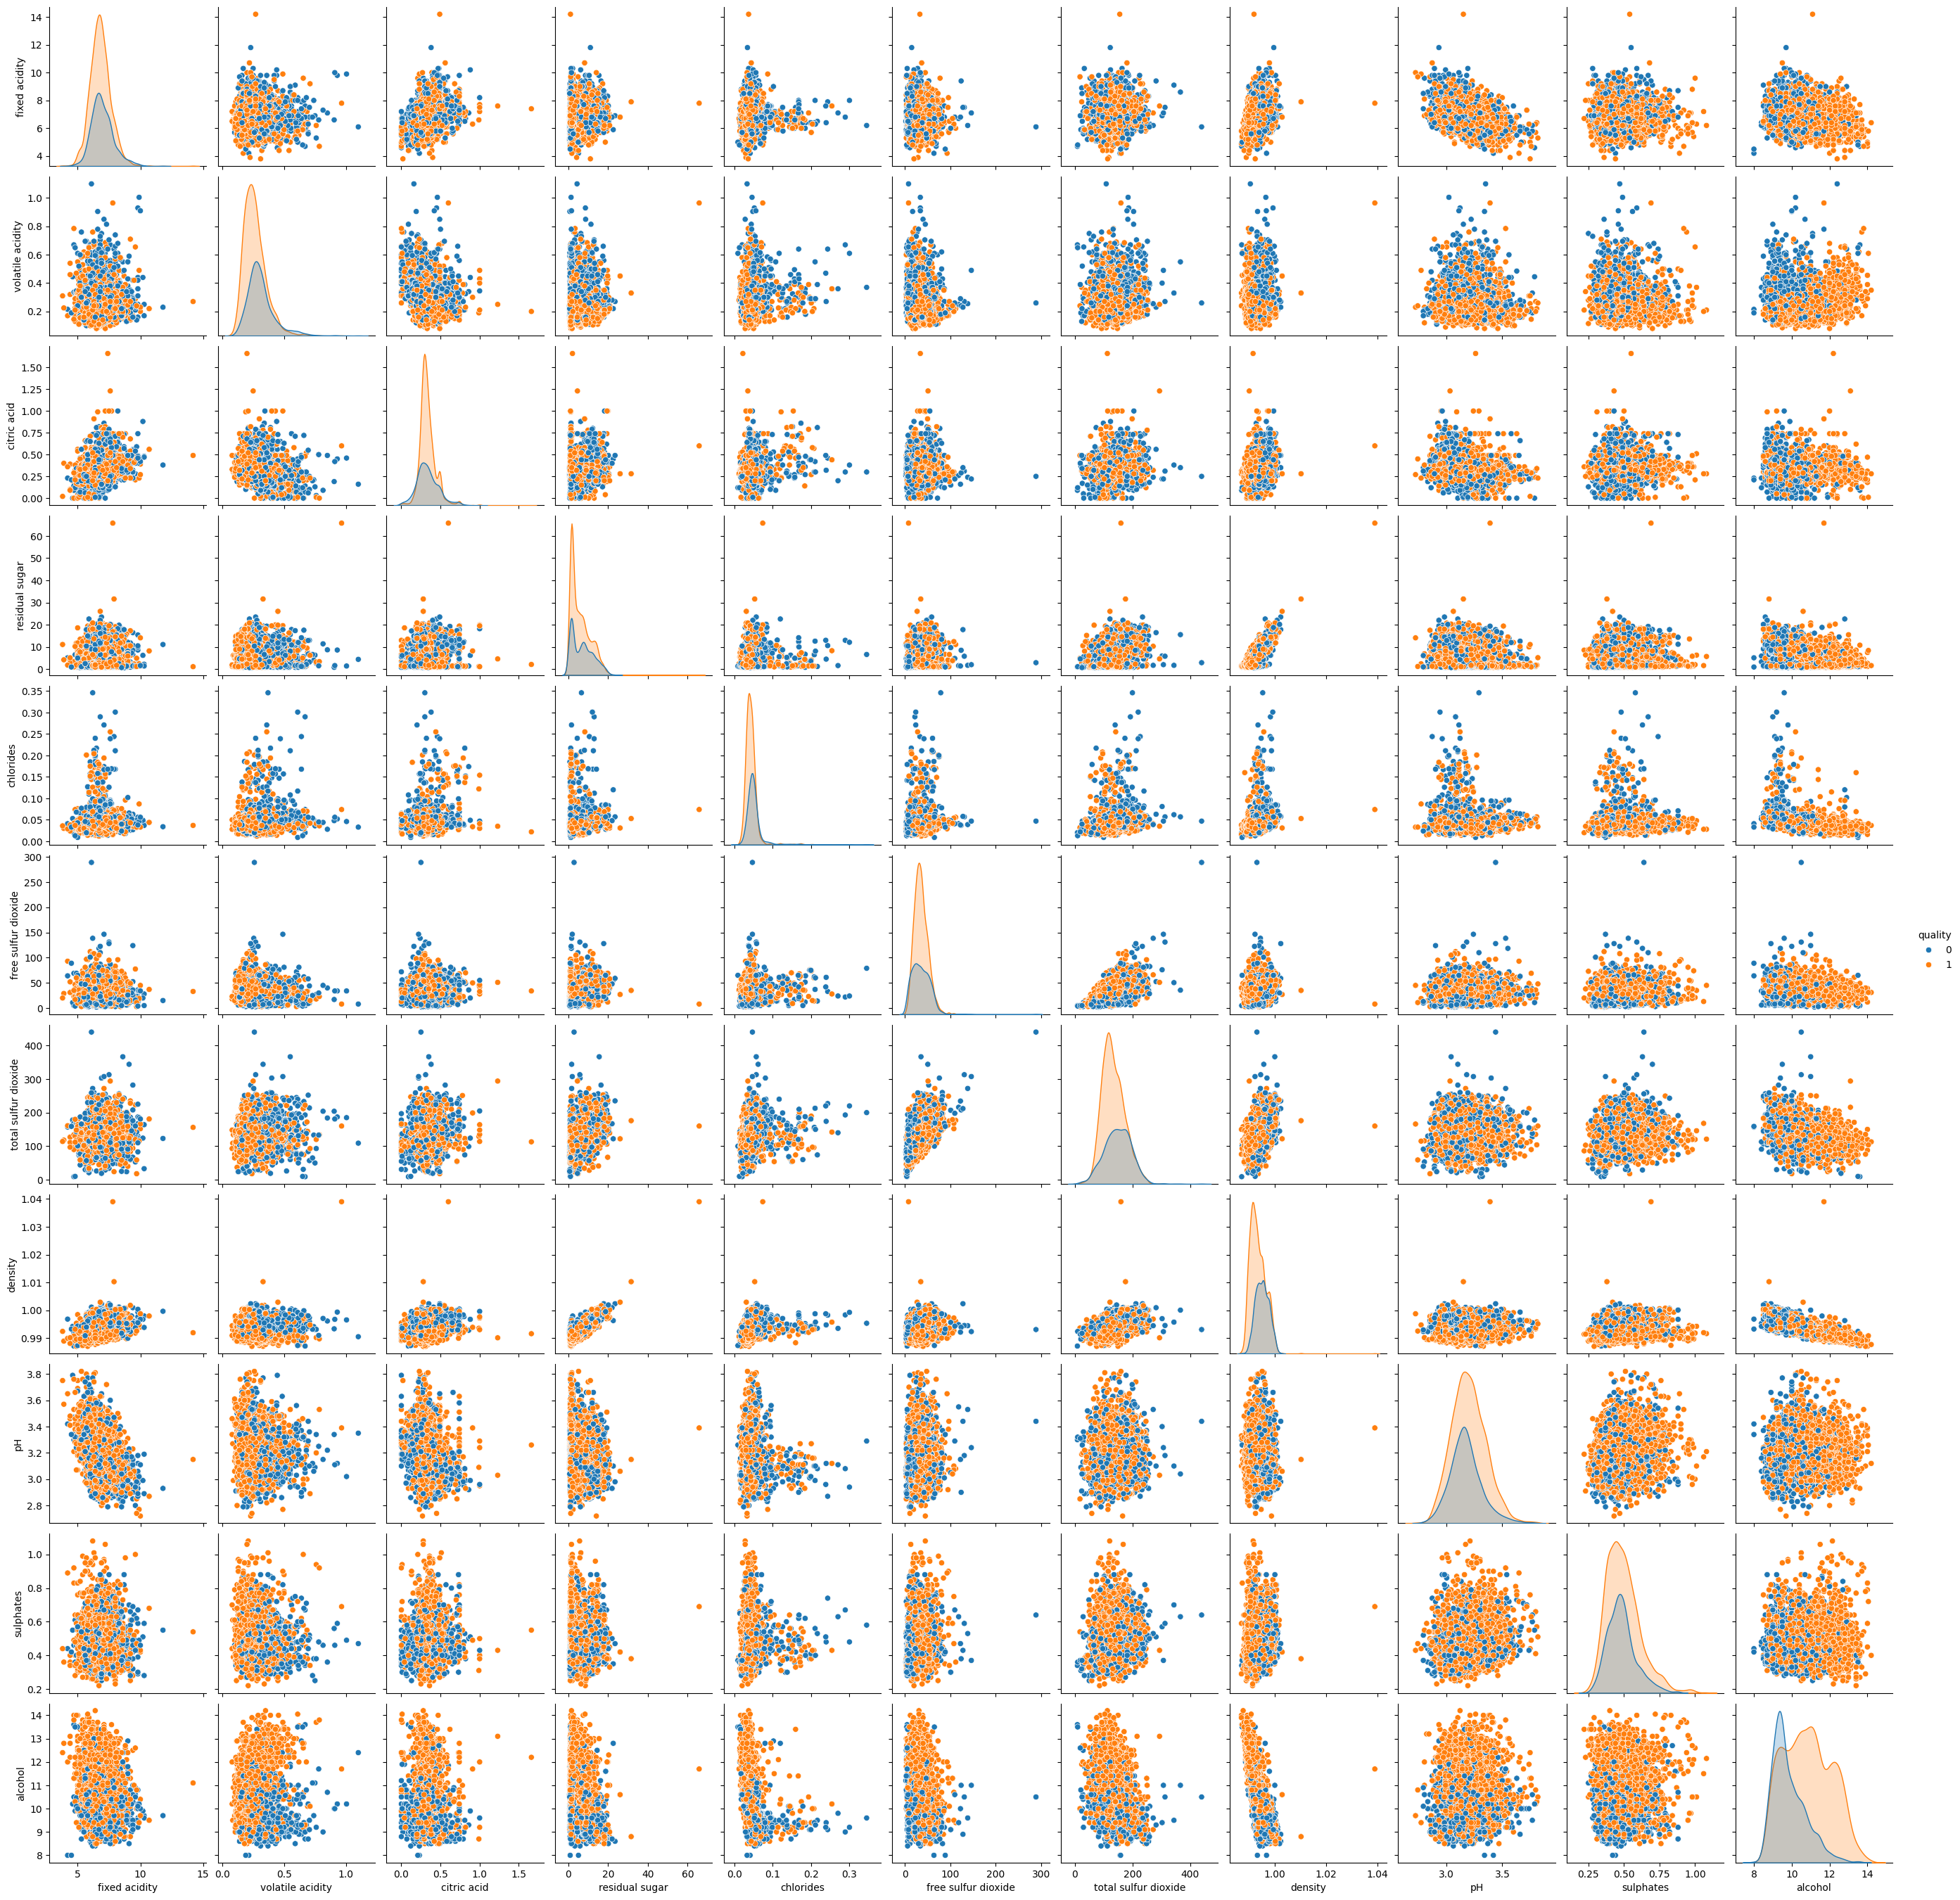

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.089749         -0.225440    -0.000700   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [11]:
import numpy as np
#PART A
#1) Euclidean distance which is basically a straight line between two points
def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

# An example to verify the funtion
vec1 = np.array([1, 2, 3])
vec2 = np.array([4, 5, 6])
print(euclidean_distance(vec1, vec2))  

#2) Calculate Manhattan distance where it is the sum of the absolute differnces
def manhattan_distance(vec1, vec2):
    return np.sum(np.abs(vec1 - vec2))

# An example to verify the funtion
print(manhattan_distance(vec1, vec2)) 

#3) Compute accuracy -> correct predictions over total predictions
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)
# Compute generalization error (1 - accuracy)
def generalization_error(y_true, y_pred):
    return 1 - accuracy(y_true, y_pred)

# An example to verify the funtion
y_true = np.array([1, 0, 1, 1, 0])
y_pred = np.array([1, 0, 1, 0, 1])
print("Accuracy:", accuracy(y_true, y_pred))
print("Generalization Error:", generalization_error(y_true, y_pred))

#4) functions to obtain Precision, recall and F1 score
def precision(y_true, y_pred):
    # True positives or TP indicate the ones that were correctly predected
    TP = np.sum((y_true == 1) & (y_pred == 1))
    # False positives or FP 
    FP = np.sum((y_true == 0) & (y_pred == 1))
    # perfome TP / (TP + FP) to get the precision
    return TP / (TP + FP) if (TP + FP) > 0 else 0

def recall(y_true, y_pred):
    # Same as TP Above
    TP = np.sum((y_true == 1) & (y_pred == 1))
    #False negatives or FN indicates the missed positive predictions
    FN = np.sum((y_true == 1) & (y_pred == 0))
    # Do TP / (TP + FN) to get recall
    return TP / (TP + FN) if (TP + FN) > 0 else 0

# F1 Score is the mean between precision and recall
def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0

# An example to verify the funtion and also see results
print("Precision:", precision(y_true, y_pred))
print("Recall:", recall(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

#5) Confusion matrix
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    # Function return the confusion matrix in a standard form
    return np.array([[TN, FP], [FN, TP]])

# An example to verify the funtion
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

#6) Receiver Operating Characteristic (ROC) curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_roc_curve(y_true, y_scores):
    #Calculating the rates for FP and TP
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    # From the import use plt to plot the ROC curve 
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="ROC Curve", linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.grid()
    plt.show()

# An example to verify the funtion and see how the curve looks like
import numpy as np
y_true_example = np.array([0, 0, 1, 1])
y_scores_example = np.array([0.1, 0.4, 0.35, 0.8])
plot_roc_curve(y_true_example, y_scores_example)

#7) Calculating the area under curve call it (AUC) for the ROC curve
from sklearn.metrics import roc_auc_score

def compute_auc(y_true, y_scores):
    # This area under the curve will help us see how well the model distinguishes between the different classes 
    return roc_auc_score(y_true, y_scores)

# Example usage to verify and we will be using AOC to see how well the model distinguishes between the different classes 
print("AUC Score:", compute_auc(y_true_example, y_scores_example))

#8) Precision-recall curve
from sklearn.metrics import precision_recall_curve
# Plotting the curve of precision recall
def plot_precision_recall_curve(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label="Precision-Recall Curve", linewidth=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()

# Example output to see the curve and verify the function
plot_precision_recall_curve(y_true_example, y_scores_example)

#9) KNN_Classifier
import numpy as np

class KNN_Classifier:
    def __init__(self, n_neighbors=5, metric="euclidean", weights="uniform"):
        """
        Initialize KNN Classifier with the given number of neighbors, distance metric, and weight function.

        Parameters:
        - n_neighbors (int): Number of nearest neighbors to consider.
        - metric (str): Distance metric to use ('euclidean' or 'manhattan').
        - weights (str): Weighting method ('uniform' or 'distance').
        """
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.weights = weights
        self.X_train = None
        self.y_train = None
        self.kwargs = {}  # Store kwargs for future distance calculations or extra parameter

    def fit(self, X, Y, n_neighbors=None, weights=None, **kwargs):
        """
        Store training data and optionally update model parameters.

        Parameters:
        - X (ndarray): Feature matrix (rows = samples, columns = features).
        - Y (ndarray): Target vector.
        """
        self.X_train = np.array(X)  # Convert to NumPy array
        self.y_train = np.array(Y)  # Convert to NumPy array
        if n_neighbors is not None:
            self.n_neighbors = n_neighbors
        if weights is not None:
            self.weights = weights
        self.kwargs = kwargs  # Store additional parameters

    def compute_distances(self, X):
        """
        Compute the distance between test samples and training samples.

        Parameters:
        - X (ndarray): Test feature matrix.

        Returns:
        - distances (ndarray): Distance matrix.
        """
        if self.metric == "euclidean":
            return np.linalg.norm(self.X_train[:, np.newaxis] - X, axis=2)
        elif self.metric == "manhattan":
            return np.sum(np.abs(self.X_train[:, np.newaxis] - X), axis=2)

    def predict(self, X):
        """
        Predict labels for given samples using KNN.

        Parameters:
        - X (ndarray): Feature matrix of samples to be classified.

        Returns:
        - predictions (ndarray): Predicted labels in column vector form (n_samples, 1).
        """
        distances = self.compute_distances(X)
        nearest_neighbors = np.argsort(distances, axis=1)[:, :self.n_neighbors]
        neighbor_labels = self.y_train[nearest_neighbors]

        if self.weights == "uniform":
            # Getting he Majority vote among neighbors
            predictions = np.array([np.bincount(neigh).argmax() for neigh in neighbor_labels])

        elif self.weights == "distance":
            # Weighting the neighbors by oppisite distance
            nearest_distances = np.take_along_axis(distances, nearest_neighbors, axis=1)  
            inv_distances = 1 / (nearest_distances + 1e-10)  
            
            weighted_votes = np.array([
                np.bincount(neigh, weights=w).argmax() for neigh, w in zip(neighbor_labels, inv_distances)
            ])
            predictions = weighted_votes

        return predictions.reshape(-1, 1)  

# Example usage to train and test the KNN implemented above
X_train_example = np.array([[1, 2], [2, 3], [3, 4], [5, 6]])
y_train_example = np.array([0, 1, 1, 0])

# Classifier for KNN
knn = KNN_Classifier(n_neighbors=3, metric="euclidean")
# Train the model
knn.fit(X_train_example, y_train_example)

# Sample data to test 
X_test_example = np.array([[2, 3], [4, 5]])
# Make pedictions
y_pred = knn.predict(X_test_example)

print("Predictions (Column Vector):\n", y_pred)


#PART B
#10) winequality-white.csv
import pandas as pd
import os

# Load dataset this is given
file_path = os.path.join(os.getcwd(), 'winequality-white.csv')
df = pd.read_csv(file_path, delimiter=';')

# Show first 5 rows
print(df.head())

#11) Convert quality column into a two-category
df['quality'] = (df['quality'] > 5).astype(int)

# Show first few rows after transformation
print(df.head())

#12) Summarize Dataset
summary_stats = df.describe()

# Display summary statistics used to see how the stats look like
print(summary_stats)
from IPython.display import display
display(summary_stats.style.set_caption("Summary Statistics"))

#13) Shuffle Data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display first few rows after shuffling
print(df.head())

#14) Generate Pair Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Generate pair plots
sns.pairplot(df, hue="quality", diag_kind="kde")
plt.show()

#15) Drop Redundant Features and Compute correlation matrix
correlation_matrix = df.corr()

# Display correlation matrix
print(correlation_matrix)  # Instead of tools.display_dataframe_to_user()

# Drop highly correlated redundant features (example)
df = df.drop(columns=['density'])  

#16) Split Dataset into Training annd test Sets
import numpy as np

def partition(X, y, t=0.2):
    """
    Split dataset into training and test sets.
    
    Parameters:
    - X (numpy array): Feature matrix.
    - y (numpy array): Target labels.
    - t (float): Test set ratio (default: 0.2).
    
    Returns:
    - X_train, X_test, y_train, y_test
    """
    split_index = int(len(X) * (1 - t))
    return X[:split_index], X[split_index:], y[:split_index], y[split_index:]

# Prepare feature matrix and target vector
X = df.drop(columns=['quality']).values  # For the feature matrix
y = df['quality'].values  # For the target vector

# Split the dataset
X_train, X_test, y_train, y_test = partition(X, y, t=0.2)

# Check dataset sizes
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

#17 A) Train KNN on Unscaled or Raw Data
knn = KNN_Classifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train, y_train)

# Predict on test data
y_pred_raw = knn.predict(X_test)

# Evaluate accuracy & F1 score
print("Raw Data Accuracy:", accuracy(y_test, y_pred_raw))
print("Raw Data F1 Score:", f1_score(y_test, y_pred_raw))

#17 B-C) Standardize Data & Re-run KNN
from sklearn.preprocessing import StandardScaler

# Standardize training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN on standardized data
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_scaled = knn.predict(X_test_scaled)

# Evaluate accuracy and F1 score
print("Standardized Data Accuracy:", accuracy(y_test, y_pred_scaled))
print("Standardized Data F1 Score:", f1_score(y_test, y_pred_scaled))

#17 D) Compare Standardized vs Unscaled/raw Data
print(f"Raw Accuracy: {accuracy(y_test, y_pred_raw)}")
print(f"Standardized Accuracy: {accuracy(y_test, y_pred_scaled)}")
print(f"Raw F1 Score: {f1_score(y_test, y_pred_raw)}")
print(f"Standardized F1 Score: {f1_score(y_test, y_pred_scaled)}")

if accuracy(y_test, y_pred_scaled) > accuracy(y_test, y_pred_raw):
    print("Standardized data is better.")
else:
    print("Raw data is better.")

#17 E) Train/Test KNN with Inverse Distance Weighting
knn.fit(X_train_scaled, y_train, weights="distance")

# Predict on test data
y_pred_weighted = knn.predict(X_test_scaled)

# Compare results
print("Weighted KNN Accuracy:", accuracy(y_test, y_pred_weighted))
print("Weighted KNN F1 Score:", f1_score(y_test, y_pred_weighted))

#PART C
# Define hyperparameter values
k_values = [1, 5, 9, 11]
distance_metrics = ["euclidean", "manhattan"]
weight_options = ["uniform", "distance"]

# Used to store results
results = {}

# Go through all combinations
for k in k_values:
    for metric in distance_metrics:
        for weight in weight_options:
            knn = KNN_Classifier(n_neighbors=k, metric=metric, weights=weight)
            knn.fit(X_train_scaled, y_train)
            y_pred = knn.predict(X_test_scaled)

            # Store accuracy
            accuracy_score = accuracy(y_test, y_pred)
            results[(k, metric, weight)] = accuracy_score
            print(f"k={k}, metric={metric}, weights={weight} --> Accuracy: {accuracy_score:.4f}")

# Find best model based on accuracy
best_params = max(results, key=results.get)
best_k, best_metric, best_weight = best_params

# Train best model
best_knn = KNN_Classifier(n_neighbors=best_k, metric=best_metric, weights=best_weight)
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

# Compute the evaluation metrics
precision_score = precision(y_test, y_pred_best)
recall_score = recall(y_test, y_pred_best)
f1_score_value = f1_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
accuracy_score = accuracy(y_test, y_pred_best)

# Output  FINAL results
print("\nBest Model Performance:")
print(f"Best Model: k={best_k}, metric={best_metric}, weights={best_weight}")
print(f"Precision: {precision_score:.4f}")
print(f"Recall: {recall_score:.4f}")
print(f"F1 Score: {f1_score_value:.4f}")
print(f"Accuracy: {accuracy_score:.4f}")
print("Confusion Matrix:\n", conf_matrix)
